In [1]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 06 Day 2
Rik Blok, with thanks to Giulia Toti

---

# Reminders

- this Wed-Fri: Module 6 Tutorial Attendance
- Wed: Module 7: Pre-Lecture Assignment
- Fri: Module 6 (One Task per Function): Worksheet
- Fri: Module 6 (One Task per Function): Code Review
- Fri: Module 6 (One Task per Function): Tutorial
- Mon-Wed: Midterm break

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Helper rules

Now we're ready to start designing bigger, more complex problems.  We use helper functions to make our programs readable and maintainable.

Each function should have one simple task that it does and it should hand off to other functions any additional tasks.

<div style="margin:auto; width:75%">
    
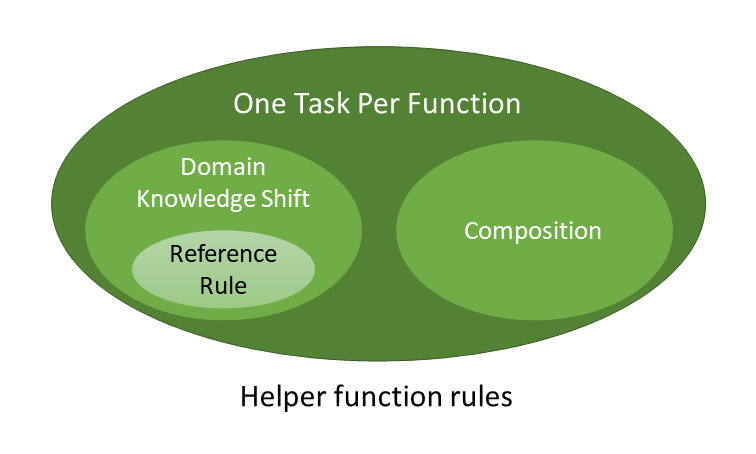

</div>

---

# When is a helper needed?

**Reference:** Use a helper function when making *references* to other non-primitive data definitions (this will be in the template). 

**Knowledge Domain Shift:** Use a helper function if a subtask involves *knowledge* about a type that is not taken as input by this function. (Won't use this one much, other than reference rule.)

**Composition:** When your solution is *composed* of multiple, separate operations, use a helper function for each distinct and complete operation that must be performed on the input data. 

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Calling functions

<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 30%">

Consider the code segment to the right, which calls a sequence of functions *using variables* to store intermediate results.

Which of the following is equivalent to the code segment?
    
</div><div style="float: right; width: 60%">

```python
first_result = first_func(parameter)
second_result = second_func(first_result)
third_result = third_func(second_result)
return third_result
```

</div></div>

  A. ```return first_result(second_result(third_result(parameter)))```  
  B. ```return third_result(second_result(first_result(parameter)))```  
  C. ```return first_func(second_func(third_func(parameter)))```  
  D. ```return third_func(second_func(first_func(parameter)))```  
  E. None of the above  

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
To solve this problem, you need to understand the order in which the functions are called and the values returned by each function. You also need to understand how to pass the output of one function as an argument to another function. Try to analyze each option and determine if it calls the three functions in the correct order and if it passes the output of each function as an argument to the next function.
    
</details>

### Calling functions

*Using variables* (as in the question's code segment) or calling functions *directly* (as in the correct response) are both acceptable.  I personally prefer *using variables* because it's more readable and easier to debug (for example, by stepping through lines in [PythonTutor](https://pythontutor.com/python-debugger.html#mode=edit)).

---

# Q: How to choose the best template?

Composition provides an alternative to data-driven templating (choosing a template based on the type of input to a function).  So, how do you decide which to use?

### A: Step 1. Start with data-driven templating

- Choose the "protagonist" of your function, the input data that will be the focus
- When there are multiple parameters, it will usually be the most complex parameter
- *Data-driven templating*: Pick the template for the "protagonist" data type
- Don't forget to cite "...with additional parameter(s)..." if needed in template comment and apply reference rule where needed

### A: Step 2. Consider whether to switch to composition

- After choosing a template, start coding your function
- If it becomes too complex, you can choose to switch to *composition* instead of the template you chose
- In this case the template will be "based on composition"
- Split into separate steps and **USE A HELPER FUNCTION** for each step
- Use data-driven templates to design helper functions

---

# Exercise: Oldest University

**Problem:** Given some universities across the world, find the oldest one in a chosen country.  Assume that there's at least one university in the chosen country.

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

### Data definitions for `University` and `List[University]`

In [ ]:
from typing import NamedTuple

University = NamedTuple('University', 
                        [('name', str),
                         ('country', str),         
                         ('year_founded', int), # in range[0,...)
                         ('students', int), # in range[0,...)
                         ('local_tuition', int), # in range[0,...]
                         ('non_local_tuition', int), # in range[0,...]
                         ('public', bool)])
# interp. a university with its name, country, year founded, 
# number of students, price of local tuition, price of non-local 
# tuition, and if it is public or not

U_UBC      = University('UBC',      'Canada', 1908, 66266,   400,  5050, True)
U_UNICAMP  = University('UNICAMP',  'Brazil', 1962, 34616,     0,     0, True)
U_PUCSP    = University('PUCSP',    'Brazil', 1908, 34616,  2000,  2000, False)
U_YALE     = University('Yale',        'USA', 1718, 13609, 10000, 20000, False)
U_HARVARD  = University('Harvard',     'USA', 1636, 20970,  5000, 10000, False)
U_SFU      = University('SFU',      'Canada', 1965, 34990,   400,  5000, True)
U_WATERLOO = University('UWaterloo','Canada', 1959, 41000, 12500,  3000, True)
U_SYD      = University('USYD',  'Australia', 1850, 63602,   500,  3500, True)

# template based on Compound
@typecheck
def fn_for_university(u: University) -> ...: 
    return ...(u.name,
               u.country,
               u.year_founded,
               u.students,
               u.local_tuition,
               u.non_local_tuition,
               u.public)



In [ ]:
from typing import List

# List[University]
# interp. a list of Universities
LOU0 = []
LOU1 = [U_UBC]
LOU2 = [U_UBC, U_UNICAMP]
LOU3 = [U_UBC, U_UNICAMP, U_PUCSP, U_YALE]
LOU4 = [U_UBC, U_UNICAMP, U_PUCSP, U_YALE, U_HARVARD, U_SFU, U_WATERLOO, U_SYD]

@typecheck
# template based on arbitrary-sized and reference rule
def fn_for_lou(lou: List[University]) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for u in lou:
        acc = ...(fn_for_university(u), acc)

    return ...(acc)



---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Data-driven template

**Problem:** Given some universities across the world, find the oldest one in a chosen country.

Given the problem statement, what parameters will our main function have?  Select ALL that apply.  [Set question type to "Multiple Answer".]

<ol style="list-style-type:upper-alpha">
    <li>A list of countries</li>
    <li>A list of universities in a chosen country</li>
    <li>A country</li>
    <li>A list of universities</li>
    <li>A university</li>
</ol>

<details class="alert alert-success"><summary style="cursor:pointer; display:list-item">✅ Follow-up question</summary>
    
Which parameter should we choose as our focus for choosing the data-driven template?  Select ONE.  [Set question type to "Multiple Choice".]
    
<ol style="list-style-type:upper-alpha">
    <li>A list of countries</li>
    <li>A list of universities in a chosen country</li>
    <li>A country</li>
    <li>A list of universities</li>
    <li>A university</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for review after class)</summary>
    
When there are multiple parameters, it will usually be the most complex parameter.
    
</details>

</details>

---

# Exercise: Oldest University

**Problem:** Given some universities across the world, find the oldest one in a chosen country.  Assume that there's at least one university in the chosen country.

Let's begin our top-down design with the <a href="#Main-function">main function</a>.  We'll come back to these helpers later.

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

### Space reserved for low-level helper 1

In [ ]:
# TODO: Fill in this helper function's skeleton after designing 
# the main function below

@typecheck
def ___
    """
    
    """
    # return True # stub
    
    # Template from University
    return ...(u.name,
               u.country,
               u.year_founded,
               u.students,
               u.local_tuition,
               u.non_local_tuition,
               u.public)

    
start_testing()

expect(___(U_UBC, "Canada"), ...)
expect(___(U_UBC, "Brazil"), ...)

summary()
     
    

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
#### Helper function `is_uni_in_country` (designed after `find_unis_in_country` helper function below)
    
```python
@typecheck
def is_uni_in_country(u: University, country: str) -> bool:
    """
    Takes a university and returns True if the university is in the given country, False otherwise
    """
    #return False #stub
    #template based on Compound
    return u.country == country

    
start_testing()

expect(is_uni_in_country(U_UBC, "Canada"), True)
expect(is_uni_in_country(U_UBC, "Brazil"), False)

summary()
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

### Space reserved for low-level helper 2

In [ ]:
# TODO: Fill in this helper function's skeleton after designing 
# the main function below

@typecheck 
def ___
    """
    ...
    """
    # return ... # stub
    
    # Template from University
    return ...(u.name,
               u.country,
               u.year_founded,
               u.students,
               u.local_tuition,
               u.non_local_tuition,
               u.public)

    
start_testing()

# example values (to reduce scrolling):
# U_UBC      = University('UBC',      'Canada', 1908, 66266,   400,  5050, True)
# U_UNICAMP  = University('UNICAMP',  'Brazil', 1962, 34616,     0,     0, True)

expect(___(U_UBC, U_UNICAMP), ...)
expect(___(U_UNICAMP, U_UBC), ...)
expect(___(U_UBC, U_UBC), ...)

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
#### Helper function `is_uni_older` (designed after `find_oldest_university` helper function below)
```python
@typecheck 
def is_uni_older(u1: University, u2: University) -> bool:
    """
    Returns True if University u1 is older than u2, False otherwise
    """
    # return True
    # Template from University with additional parameter University
    return u1.year_founded < u2.year_founded

    
# Tests for is_uni_older
start_testing()

expect(is_uni_older(U_UBC, U_UNICAMP), True)
expect(is_uni_older(U_UNICAMP, U_UBC), False)
expect(is_uni_older(U_UBC, U_UBC), False)

summary()
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

### Space reserved for high-level helper 1

In [ ]:
# TODO: Fill in this helper function's skeleton after designing 
# the main function below

@typecheck
def ___
    """
    
    """
    # return [] # stub

    # Template from List[University]
    # description of the accumulator
    acc = ...   # type: ...

    for u in lou:
        acc = ...(fn_for_university(u), acc)

    return ...(acc)


start_testing()

# example values (to reduce scrolling):
# U_UBC      = University('UBC',      'Canada', 1908, 66266,   400,  5050, True)
# U_UNICAMP  = University('UNICAMP',  'Brazil', 1962, 34616,     0,     0, True)
# U_PUCSP    = University('PUCSP',    'Brazil', 1908, 34616,  2000,  2000, False)
# U_YALE     = University('Yale',        'USA', 1718, 13609, 10000, 20000, False)
# U_HARVARD  = University('Harvard',     'USA', 1636, 20970,  5000, 10000, False)
# U_SFU      = University('SFU',      'Canada', 1965, 34990,   400,  5000, True)
# U_WATERLOO = University('UWaterloo','Canada', 1959, 41000, 12500,  3000, True)
# U_SYD      = University('USYD',  'Australia', 1850, 63602,   500,  3500, True)
# LOU1 is [U_UBC]
# LOU2 is [U_UBC, U_UNICAMP]
# LOU3 is [U_UBC, U_UNICAMP, U_PUCSP, U_YALE]
# LOU4 is [U_UBC, U_UNICAMP, U_PUCSP, U_YALE, U_HARVARD, U_SFU, U_WATERLOO, U_SYD]

expect(___([], 'Canada'), ...)
expect(___(LOU1, 'Canada'), ...)
expect(___(LOU1, 'Brazil'), ...)
expect(___(LOU2, 'Brazil'), ...)
expect(___(LOU3, 'Brazil'), ...)
expect(___(LOU4, 'Canada'), ...)
expect(___(LOU4, 'Brazil'), ...)
expect(___(LOU4, 'USA'), ...)
expect(___(LOU4, 'Australia'), ...)

summary()

# Note how this function is perfectly ok with handling and
# returning empty lists, unlike the top function.
# It is ok for the top function to have stricter assumptions, 
# but they should not necessarily tranfer to all the helpers. 
# Treat the helpers as independent functions.



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
#### Helper function `find_unis_in_country` (designed after main function below)
```python
@typecheck
def find_unis_in_country(lou: List[University], country: str) -> List[University]:
    """
    Takes a list of universities and filters the list to show only the universities in a particular country
    """
    #return [] #stub
    #template from List[University]
    #Universities in country so far in the list of universities
    unis_in_country = [] # type: List[University]
    for u in lou:
        if is_uni_in_country(u, country):
            unis_in_country.append(u)
    return unis_in_country


# Tests for find_unis_in_country
# Note how this function is perfectly ok with handling and returning empty lists, unlike the top function.
# It is ok for the top function to have stricter assumptions, but they should not necessarily tranfer
# to all the helpers. Treat the helpers as independent functions.
start_testing()

expect(find_unis_in_country([], 'Canada'), [])
expect(find_unis_in_country(LOU1, 'Canada'), LOU1)
expect(find_unis_in_country(LOU1, 'Brazil'), [])
expect(find_unis_in_country(LOU2, 'Brazil'), [U_UNICAMP])
expect(find_unis_in_country(LOU3, 'Brazil'),[U_UNICAMP,U_PUCSP])
expect(find_unis_in_country(LOU4, 'Canada'),[U_UBC, U_SFU, U_WATERLOO])
expect(find_unis_in_country(LOU4, 'Brazil'),[U_UNICAMP, U_PUCSP])
expect(find_unis_in_country(LOU4, 'USA'),[U_YALE, U_HARVARD])
expect(find_unis_in_country(LOU4, 'Australia'),[U_SYD])

summary()
```
    
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

### Space reserved for high-level helper 2

In [ ]:
# TODO: Fill in this helper function's skeleton after designing 
# the main function below

@typecheck
def ___
    """
    
    """
    # return U_UBC # stub

    # Template from List[University]
    # description of the accumulator
    acc = ...   # type: ...

    for u in lou:
        acc = ...(fn_for_university(u), acc)

    return ...(acc)
    

start_testing()

# example values (to reduce scrolling):
# U_UBC      = University('UBC',      'Canada', 1908, 66266,   400,  5050, True)
# U_UNICAMP  = University('UNICAMP',  'Brazil', 1962, 34616,     0,     0, True)
# U_PUCSP    = University('PUCSP',    'Brazil', 1908, 34616,  2000,  2000, False)
# U_YALE     = University('Yale',        'USA', 1718, 13609, 10000, 20000, False)
# U_HARVARD  = University('Harvard',     'USA', 1636, 20970,  5000, 10000, False)
# U_SFU      = University('SFU',      'Canada', 1965, 34990,   400,  5000, True)
# U_WATERLOO = University('UWaterloo','Canada', 1959, 41000, 12500,  3000, True)
# U_SYD      = University('USYD',  'Australia', 1850, 63602,   500,  3500, True)
# LOU3 is [U_UBC, U_UNICAMP, U_PUCSP, U_YALE]

expect(___(LOU3), ...)
expect(___([U_UBC]), ...)
expect(___([U_HARVARD, U_SFU, U_WATERLOO, U_SYD]), ...)
expect(___([U_WATERLOO, U_SFU, U_HARVARD, U_SYD]), ...)

# Tip: for finding, test lists where the variable of interest 
# is at different positions (first, last, middle).
# This function has a different set of assumptions from the 
# top one (it only assumes that the list is not empty).

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
#### Helper function `find_oldest_university` (designed after main function below)
```python
@typecheck
def find_oldest_university(lou: List[University]) -> University:
    """
    Returns oldest university in a list (assumes the list is never empty)
    """
    # return U_UBC
    # Template from List[University]
    # Oldest university in the list so far
    acc = lou[0]   # type: University

    for u in lou:
        if is_uni_older(u, acc):
            acc = u

    return acc

    
# Tests for find_oldest_university 
# Tip: for finding, test lists where the variable of interest is at different positions (first, last, middle)
# Again, this function has a different set of assumptions from the top one
# (it only assumes that the list is not empty)
start_testing()

expect(find_oldest_university(LOU3), U_YALE)
expect(find_oldest_university([U_UBC]), U_UBC)
expect(find_oldest_university([U_HARVARD, U_SFU, U_WATERLOO, U_SYD]), U_HARVARD)
expect(find_oldest_university([U_WATERLOO, U_SFU, U_HARVARD, U_SYD]), U_HARVARD)

summary()
```
    
</details>

---

### Main function

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Data-definitions-for-University-and-List[University])
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>
    
</details>

**Problem:** Given some universities across the world, find the oldest one in a chosen country.

The *stub* and *examples* have already been designed.  We begin with templating...

In [ ]:
@typecheck
def oldest_university_in_country(lou: List[University], 
                                 country: str) -> University:
    """
    Return the oldest university in a country.
    Assume the list of universities is not empty, 
    there is no tie, and there is at least one university 
    in this country in the list.
    """
    
    return U_UBC # stub
    

start_testing()

expect(oldest_university_in_country([U_UBC], 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU3, 'Brazil'), U_PUCSP)
expect(oldest_university_in_country(LOU3, 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU3, 'USA'), U_YALE)
expect(oldest_university_in_country(LOU4, 'Australia'), U_SYD)
expect(oldest_university_in_country(LOU4, 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU4, 'Brazil'), U_PUCSP)
expect(oldest_university_in_country(LOU4, 'USA'), U_HARVARD)

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
When we try to template from the data type `List[University]` we soon run into trouble.  It's not clear how to design an accumulator to perform the steps required.  We need to filter for the universities in a country **before** we find the oldest.  Otherwise, the oldest university we find might be in another country!  So there appear to be separate steps involved.
    
```python
@typecheck
def oldest_university_in_country(lou: List[University], country: str) -> University:
    """
    return the oldest university in a country
    assume the list of universities is not empty, there is no tie 
    and there is at least one university in this country on the list
    """
    
    # return U_UBC # stub
    
    # Template based on composition
    # Step 1: filter lou to keep only universities in country and save in filtered_lou
    # Step 2: find oldest university filtered_lou
    # Step 3: return oldest university 
    
    filtered_lou = find_unis_in_country(lou, country) # Step 1
    oldest_uni = find_oldest_university(filtered_lou) # Step 2
    return oldest_uni # Step 3


start_testing()

expect(oldest_university_in_country([U_UBC], 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU3, 'Brazil'), U_PUCSP)
expect(oldest_university_in_country(LOU3, 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU3, 'USA'), U_YALE)
expect(oldest_university_in_country(LOU4, 'Australia'), U_SYD)
expect(oldest_university_in_country(LOU4, 'Canada'), U_UBC)
expect(oldest_university_in_country(LOU4, 'Brazil'), U_PUCSP)
expect(oldest_university_in_country(LOU4, 'USA'), U_HARVARD)

summary()
```
    
</details>

---

# Helper levels

Notice that our main function called two *high-level* helper functions.  Each of those high-level helpers called their own *low-level* helper function.

<table>
    <tr>
        <td style="text-align: center" colspan="2"><a href="#Main-function">Main function:<br />find oldest university in country</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">🡷 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-1">High-level helper:<br />find universities in country</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-high-level-helper-2">High-level helper:<br />find oldest university</a></td>
    </tr>
    <tr>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-1">Low-level helper:<br />is university in country?</a></td>
        <td style="text-align: center"><a href="#Space-reserved-for-low-level-helper-2">Low-level helper:<br />is university older?</a></td>
    </tr>
</table>

You may design helper functions to any depth required by the problem.

---

# Helper function reuse

Helper functions can often be adapted for other tasks beyond their original intended purpose.

When designing helpers, try to make them as flexible as possible to increase their usefulness and versatility.

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker questions: Helper function reuse

In addition to the helper functions we've already designed, let's say you have access to these additional helpers:
- `find_public_unis(lou)` - returns public universities in `lou`
- `local_tuition_at_most(lou, amt)` - returns universities with local tuition less than or equal to `amt`
- `nonlocal_tuition_at_most(lou, amt)` - returns universities with nonlocal tuition less than or equal to `amt`

Several tasks are shown below (A-E).

Given a list of universities `lou` and any other needed data, indicate which of the tasks would be performed by each of the following function bodies (direct function calls without using intermediate variables):

1. 
```python
return find_oldest_university(find_unis_in_country(lou, c1) + find_unis_in_country(lou, c2))
```

<details><summary style="cursor:pointer; display:list-item">Next</summary>

2. 
```python
return find_unis_in_country(find_public_unis(find_oldest_university(lou)), c)
```
    
<details><summary style="cursor:pointer; display:list-item">Next</summary>

3. 
```python
return nonlocal_tuition_at_most(find_unis_in_country(find_public_unis(lou), c), amt)
```

<details><summary style="cursor:pointer; display:list-item">Next</summary>

4. 
```python
return local_tuition_at_most(find_public_unis(lou), amt) + nonlocal_tuition_at_most(find_public_unis(lou), amt)
```

</details>
</details>
</details>


<ol style="list-style-type:upper-alpha">
    <li>Find the oldest university from among two countries.</li>
    <li>Find all public universities with tuition (local or non-local) no more than a given amount.</li>
    <li>Find the oldest public university in a country.</li>
    <li>Find all public universities in a country with nonlocal tuition no more than a given amount.</li>
    <li>Something else</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hints (for your review after class)</summary>

1. ...
2. Not C
3. ...
4. ...

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Answers (for your review after class)</summary>

1. A
2. E
3. D
4. B

</details>  

</details>  

---

<div class="alert alert-success">
    
✅ If you design your helper functions to be versatile, they can be reused to carry out many more tasks!
    
</div>

---